In [1]:
import pandas as pd

In [23]:
df = pd.read_csv("../checkpoints/results_multi_scale_bert.csv")
df.shape

(13, 18)

In [14]:
import matplotlib.pyplot as plt

In [15]:
def draw_graphs(results, subtitles):
    validation_all = ["validation_loss_{}".format(subtitle) for subtitle in subtitles]
    train_all = ["train_loss_{}".format(subtitle) for subtitle in subtitles]
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(results[train_all], marker='.', label=validation_all)
    axs[1].plot(results[validation_all], marker='.', label=validation_all)
    axs[0].set_title("Training loss comparison")
    axs[1].set_title("Validation loss comparison")
    for i in range(2):
        axs[i].set_xlabel("Epoch")
        axs[i].set_ylabel("MSE")
        axs[i].legend()
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    kappas = ['kappa_scores_mean'] + ["kappa_{}".format(subtitle) for subtitle in subtitles]
    maes = ['maes_mean']  + ["mae_{}".format(subtitle) for subtitle in subtitles]
    axs[0].plot(results[kappas], marker='.', label=kappas)
    axs[1].plot(results[maes], marker='.', label=maes)
    axs[0].set_title("QWK score comparison")
    axs[1].set_title("MAE comparison")
    axs[0].set_ylabel('QWK')
    axs[1].set_ylabel("MAE")
    for i in range(2):
        axs[i].set_xlabel("Epoch")
        axs[i].legend()
    plt.show()

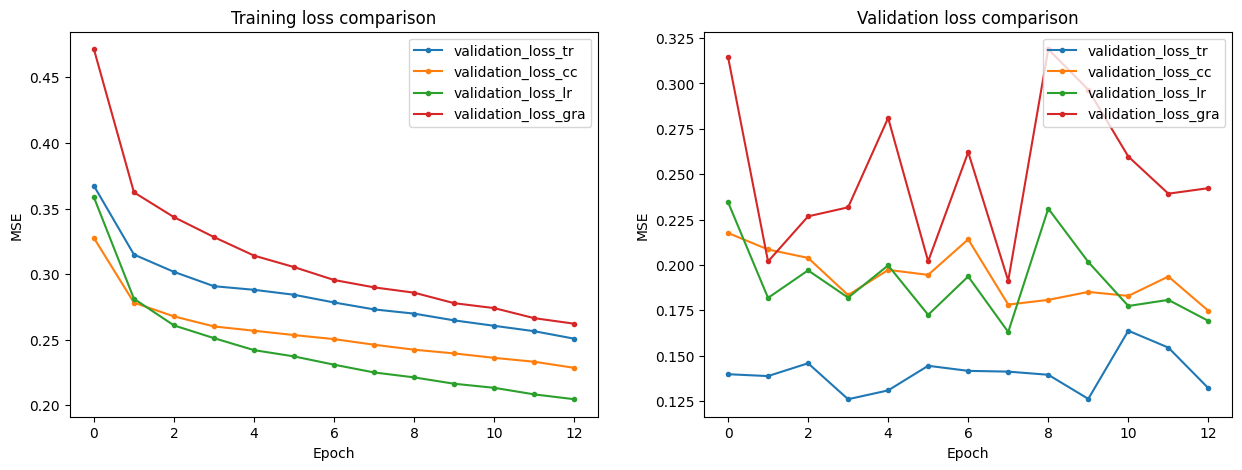

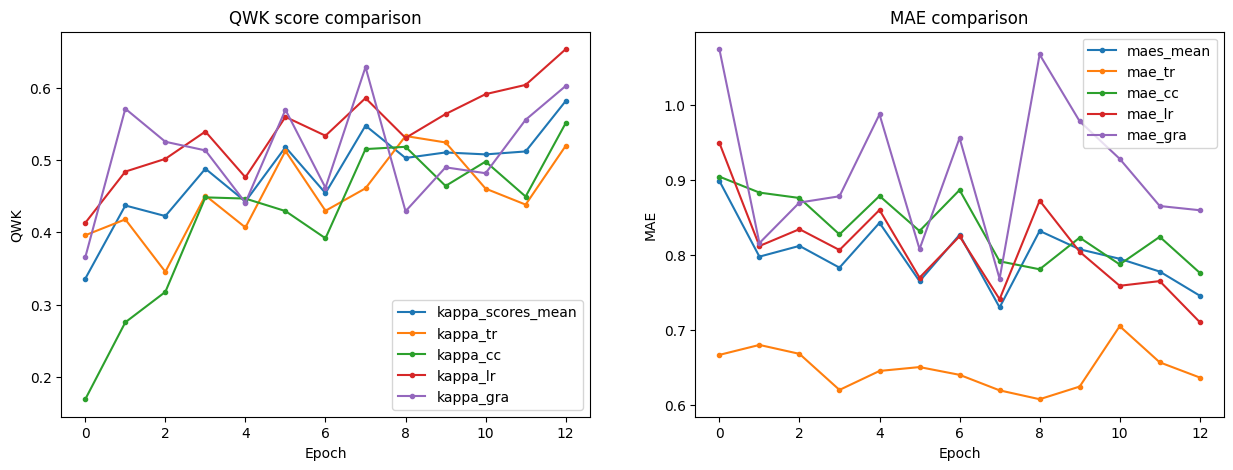

In [24]:
draw_graphs(df, ['tr', 'cc', 'lr', 'gra']) # multi scale bert

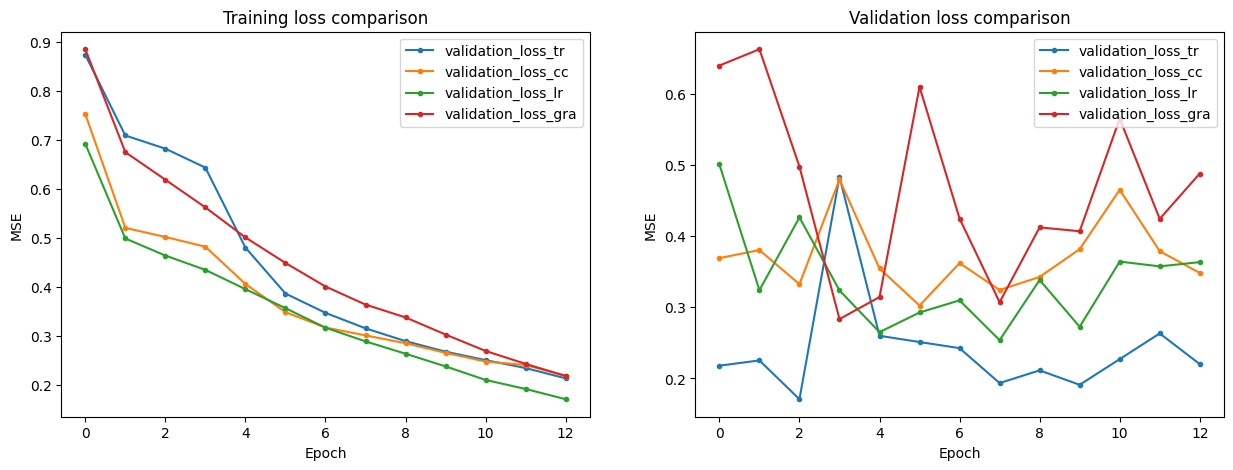

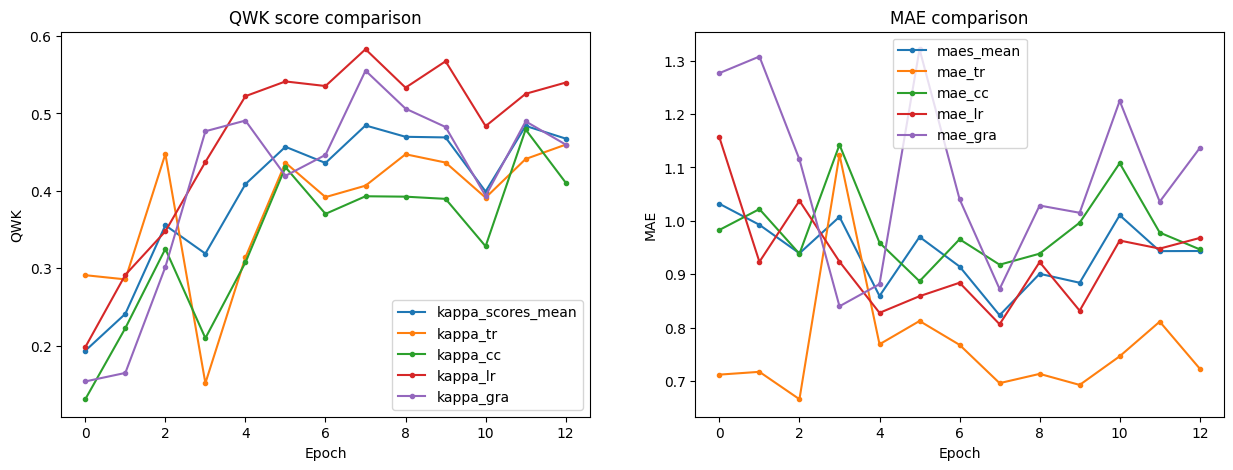

In [22]:
draw_graphs(df, ['tr', 'cc', 'lr', 'gra']) # gpt2

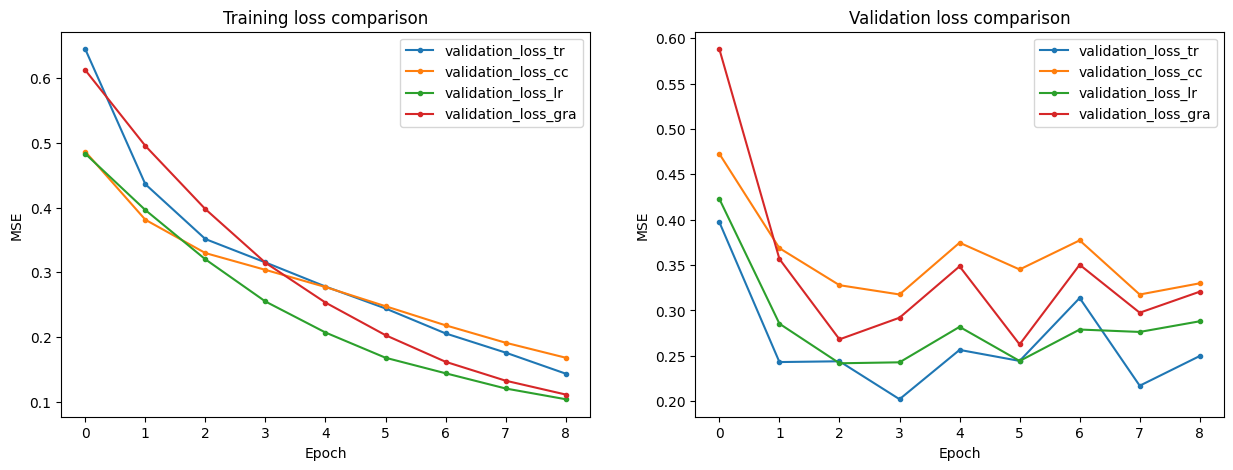

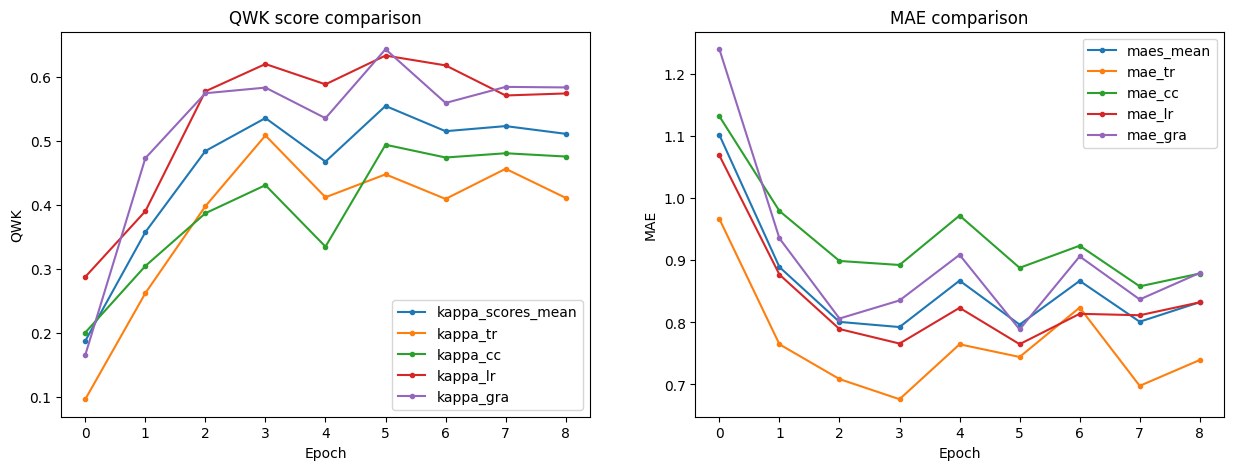

In [19]:
draw_graphs(df, ['tr', 'cc', 'lr', 'gra']) # bert

In [4]:
df.loc[(df['num_paragraphs'] < 3) & (df['Coherence and Cohesion'] > 4.0), 'Coherence and Cohesion'] = 4.0
df.loc[(df['num_paragraphs'] > 8) & (df['Coherence and Cohesion'] > 4.0), 'Coherence and Cohesion'] = 4.0

In [5]:
df.to_csv('New Augmented_Dataset.csv', index=False)